In [ ]:
from skimage import exposure
import matplotlib.pyplot as plt
from skimage import measure
import numpy as np
import math
from PIL import Image
def PolyArea(x,y):
 return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))
def plot() :
 # Display the image and create the plots
 fig,ax = plt.subplots()
 ax.imshow(kidneyData, interpolation='nearest', cmap=plt.cm.gray)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
imagedir="/content/gdrive/MyDrive/Images/"
import os
filenames = os.listdir(imagedir)
for f in filenames:
  print(imagedir + f)

/content/gdrive/MyDrive/Images/Cyst- (1).jpg
/content/gdrive/MyDrive/Images/Normal- (1).jpg
/content/gdrive/MyDrive/Images/Stone- (1).jpg
/content/gdrive/MyDrive/Images/Tumor- (1).jpg


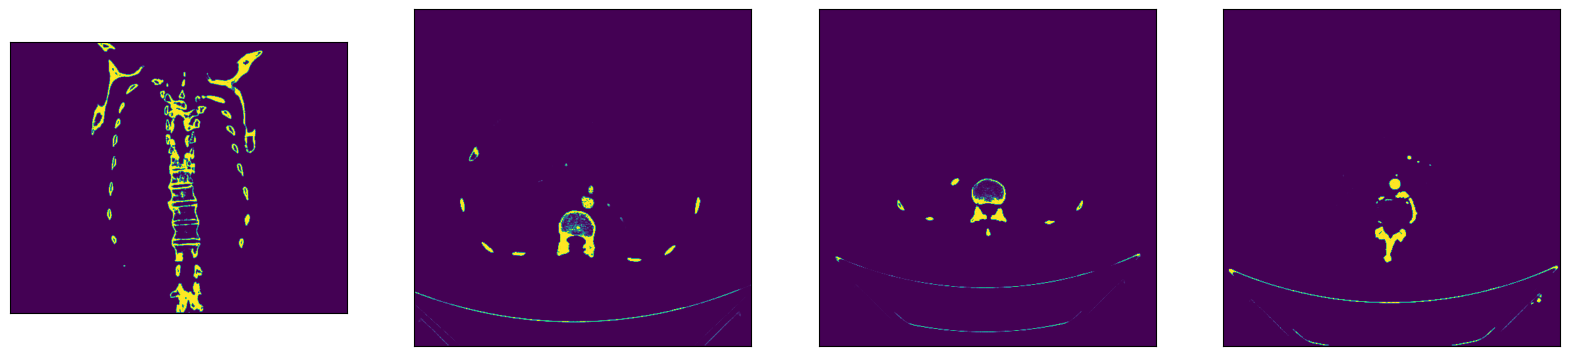

In [ ]:
from PIL import Image
fig ,axs = plt.subplots(1,len(filenames),figsize=(20,20))
for i,f in enumerate(filenames):
    kidneyData = np.asarray(Image.open(imagedir + f))
    if kidneyData.ndim==3 :
        kidneyData = kidneyData[:,:,1]
    gamma_corrected = exposure.adjust_gamma(kidneyData, 15)
    axs[i].imshow(gamma_corrected)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    plt.imshow(gamma_corrected)

i=1
Radius of Contour 36 : 17.99479377655084
Radius of Contour 38 : 20.85489403148032


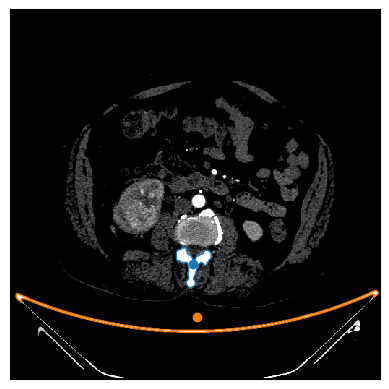

In [ ]:
for i in [1]:
        print("i=" + str(i))
        # Display the image and create the plots
        fig,ax = plt.subplots()
        ax.imshow(kidneyData, interpolation='nearest', cmap=plt.cm.gray)
        contours = measure.find_contours(gamma_corrected, i)
        # Enumerate through contours
        for n, contour in enumerate(contours):
          # Find area within contour
          A = PolyArea(contour[:, 1], contour[:, 0])
          # If contour area A greater than some number
          if A > 300 :            
            # If contour area A greater than some number
            # Plot the contours greater than the number
            ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
            # Find center of contour (x,y)
            xavg = np.mean(contour[:,1])
            yavg = np.mean(contour[:,0])
            # Plot the centers of the contours
            ax.scatter(xavg,yavg)
            ax.set_xticks([])
            ax.set_yticks([])
            # Print radius of contours
            print("Radius of Contour " + str(n)+" : "+str(math.sqrt(A/math.pi)))
plt.show()

In [ ]:
import os
import shutil

# Define the path to the original dataset
data_path = '/content/gdrive/MyDrive/AICapstoneProjectData/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
# Define the path to the output directory
output_path = './dataset'

# Define the ratios for train/val/test splits
train_ratio = 0.8
test_ratio = 0.2

# Create the output directories if they do not exist
if not os.path.exists(output_path):
    os.makedirs(output_path)
for dir_name in ['train', 'test']:
    dir_path = os.path.join(output_path, dir_name)
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    for class_name in ['Cyst','Normal','Stone','Tumor']:
        class_path = os.path.join(dir_path, class_name)
        if not os.path.exists(class_path):
            os.makedirs(class_path)

# Loop over each class and copy files to train/val/test directories
for class_name in ['Cyst', 'Normal', 'Stone', 'Tumor']:
    class_path = os.path.join(data_path, class_name)
    files = os.listdir(class_path)
    num_files = len(files)
    num_train = int(num_files * train_ratio)
    num_test = num_files - num_train
    for i, file_name in enumerate(files):
        src_path = os.path.join(class_path, file_name)
        if i < num_train:
            dst_path = os.path.join(output_path, 'train', class_name, file_name)
        else:
            dst_path = os.path.join(output_path, 'test', class_name, file_name)
        shutil.copy(src_path, dst_path)